# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `8` | `Questions`

> Hi, Team. 👋

> As discussed, throughout our semester, I’ve been doing my best to pace your learning while expanding your expertise and providing a novel framework that you could deploy in real-world practices. I kept revising all the lecture materials and exercise problem-sets so they aligned with your level of understanding.

> This week’s exercise questions, as always, are intended to help you integrate what you have learned in the course, rather than test you. Please do as much as you can and feel free to submit your work, so that I can capture where you stand and pace your learning more precisely. 

> The questions below aren’t difficult as they ask incremental expansion of (with logical progression of) some of the questions you solved in previous exercise problem-sets.

> Hope you find them helpful!"🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import plotly.express as px 
import plotly.graph_objects as go

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

from sklearn.decomposition import TruncatedSVD

from numpy.linalg import inv, eig, svd

from sklearn.manifold import TSNE  # Used for FX

In [3]:
from sklearn.preprocessing import StandardScaler

from pandas.plotting import scatter_matrix

> Let's set some print option.

In [4]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

%matplotlib inline

## 👇 <font color = "purple"> Bigger Question 1. ### 

### The first expanded question is where you will execute principal component analysis (PCA) for portfolio management.
    
    As noted in the lesson, the principal components of the correlation matrix capture 
    most of the covariation among assets in descending order and are mutually uncorrelated.
    
    Importantly, we can employ standardized principal components as portfolio weights.
    
    Randomly choose 40 stock tickers among the stock tickers from below DF.
    
> Set the seed number 627 for an identical set of stock tickers at the starting point of your analysis for everyone.
    
    Your objective is to find the portfolio using PCA.
    
    Select and normalize the four largest components and use them as weights for 
    portfolios that you can compare to an equal-weighted portfolio comprising all stocks.
    
    Identify the profile of the portfolio based on the portfolio weights.
    
    When comparing the performance of each portfolio over the sample period to “the market”, 
    assess the performance of other portfolios that capture different return patterns.
    
> Please use 80% of your data for PCA and 20% for backtesting.    
    
### <font color = "green"> NOTE: The investment horizon will be 11 years between 2009 and 2019.

In [5]:
list_of_tickers = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]

list_of_tickers

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


### Below are the lines of code that lead to an answer:

In [6]:
Analysis_start = "2009-01-01"
Analysis_end = "2020-01-01"

In [7]:
chosen_tickers = \
    (
        list_of_tickers["Symbol"]
        .sample(n=40, random_state=627)
    )

In [8]:
chosen_tickers_list = list(chosen_tickers)

In [9]:
stock_data = yf.download(chosen_tickers_list, 
                        start=Analysis_start, 
                        end=Analysis_end)

[*********************100%%**********************]  40 of 40 completed

2 Failed downloads:
['SOLV', 'GEV']: YFChartError("%ticker%: Data doesn't exist for startDate = 1230786000, endDate = 1577854800")


In [10]:
portfolio_df = stock_data["Adj Close"]

In [11]:
portfolio_df 

Ticker,ADSK,ALL,BKR,BLDR,CI,CPT,CSGP,D,DLTR,DVA,...,SOLV,SPGI,STZ,SWKS,TPR,UNH,UNP,VZ,WTW,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-02,20.680000,22.953997,17.469767,1.510000,16.534679,15.815988,3.351000,18.830572,14.016667,24.549999,...,NaN,18.436100,14.501045,4.690694,14.558531,22.106049,17.912792,14.407174,47.575081,45.689560
2009-01-05,20.879999,22.477802,18.202551,1.520000,16.869280,15.609059,3.323000,18.758427,13.940000,23.750000,...,NaN,18.421125,14.545124,4.665522,14.479194,21.745489,18.598862,13.508811,46.915356,45.683979
2009-01-06,20.850000,22.043016,19.378057,1.350000,16.887865,16.251030,3.448000,18.665655,13.223333,23.445000,...,NaN,19.095350,14.871284,5.017951,14.485806,21.232702,19.299215,13.292534,48.894512,44.939640
2009-01-07,20.070000,20.766264,18.278881,1.270000,15.884075,16.208597,3.462000,18.387375,13.846667,23.610001,...,NaN,18.518503,13.645968,4.749434,14.254403,21.072458,17.780582,13.461325,48.819122,43.792370
2009-01-08,19.200001,21.325275,18.889530,1.350000,16.162905,16.134314,3.593000,18.279144,13.876667,23.750000,...,NaN,17.716938,13.266914,4.455740,13.818046,21.400961,17.609062,13.668095,49.252636,44.262482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,183.910004,98.537369,22.080158,25.430000,191.234634,89.815208,60.027000,66.375420,93.230003,75.019997,...,NaN,261.618347,174.235947,111.101440,23.798014,274.720184,162.164032,46.508625,188.455399,55.392143
2019-12-26,184.240005,98.918510,22.149483,25.389999,191.581436,89.712746,60.148998,66.457008,92.080002,74.769997,...,NaN,262.635986,176.875214,111.210579,24.234100,275.755463,162.993362,46.516212,188.483414,55.479160
2019-12-27,185.380005,99.157837,22.088823,25.450001,191.225281,89.815208,59.859001,66.897537,92.839996,74.750000,...,NaN,263.336914,176.474182,111.219688,23.922615,276.053986,163.534225,46.698353,188.240784,55.289310


In [12]:
missing_values =\
(
    portfolio_df 
    .isnull() # True (1) vs. False (0)
    .mean()
    .sort_values(ascending = False)
)

missing_values.head(10)

Ticker
SOLV    1.000000
GEV     1.000000
FOXA    0.925939
LW      0.714957
HWM     0.712428
KHC     0.591040
TPR     0.000000
SWKS    0.000000
STZ     0.000000
SPGI    0.000000
dtype: float64

In [13]:
drop_list =\
(
    sorted(list(missing_values[missing_values > 0.30]
                .index)
          )
)

portfolio_df =\
(
    portfolio_df
    .drop(labels = drop_list,
          axis = 1)
)

In [14]:
portfolio_df =\
(
    portfolio_df
    .fillna(method = "ffill")
)

portfolio_df =\
(
    portfolio_df
    .dropna(axis = 0)
)

portfolio_df.shape

(2768, 34)

In [15]:
Daily_Linear_Return =\
(
    portfolio_df
    .pct_change(1)
)

Daily_Linear_Return.head()

Ticker,ADSK,ALL,BKR,BLDR,CI,CPT,CSGP,D,DLTR,DVA,...,REGN,SPGI,STZ,SWKS,TPR,UNH,UNP,VZ,WTW,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-05,0.009671,-0.020746,0.041946,0.006623,0.020236,-0.013083,-0.008356,-0.003831,-0.005470,-0.032587,...,0.020321,-0.000812,0.003040,-0.005366,-0.005450,-0.016310,0.038301,-0.062355,-0.013867,-0.000122
2009-01-06,-0.001437,-0.019343,0.064579,-0.111842,0.001102,0.041128,0.037617,-0.004946,-0.051411,-0.012842,...,-0.006289,0.036601,0.022424,0.075539,0.000457,-0.023581,0.037656,-0.016010,0.042186,-0.016293
2009-01-07,-0.037410,-0.057921,-0.056723,-0.059259,-0.059439,-0.002611,0.004060,-0.014909,0.047139,0.007038,...,-0.051688,-0.030209,-0.082395,-0.053511,-0.015974,-0.007547,-0.078689,0.012698,-0.001542,-0.025529
2009-01-08,-0.043348,0.026919,0.033407,0.062992,0.017554,-0.004583,0.037839,-0.005886,0.002167,0.005930,...,0.016685,-0.043285,-0.027778,-0.061838,-0.030612,0.015589,-0.009646,0.015360,0.008880,0.010735


In [16]:
# You are deleting rows that have returns more than 3SD 
# Operational defition of outliers = data points beyond 3 SD

Daily_Linear_Return =\
(
    Daily_Linear_Return[Daily_Linear_Return 
                        .apply(lambda x:(x - x.mean()
                                        ).abs() < (3 * x.std()
                                                  )
                              )
                        .all(1)
    ]
)

In [17]:
scaler =\
(
    StandardScaler()
    .fit(Daily_Linear_Return)
)

In [18]:
scaled_portfolio =\
(
    pd
    .DataFrame(scaler.fit_transform(Daily_Linear_Return),
               columns = Daily_Linear_Return.columns,
               index = Daily_Linear_Return.index)
)

scaled_portfolio.describe()

Ticker,ADSK,ALL,BKR,BLDR,CI,CPT,CSGP,D,DLTR,DVA,...,REGN,SPGI,STZ,SWKS,TPR,UNH,UNP,VZ,WTW,XOM
count,2.084000e+03,2.084000e+03,2.084000e+03,2.084000e+03,2.084000e+03,2.084000e+03,2.084000e+03,2.084000e+03,2.084000e+03,2.084000e+03,...,2.084000e+03,2.084000e+03,2.084000e+03,2.084000e+03,2.084000e+03,2.084000e+03,2.084000e+03,2.084000e+03,2.084000e+03,2.084000e+03
mean,-4.517606e-17,5.199509e-17,1.022854e-17,-3.494752e-17,7.671407e-17,6.819028e-18,-2.557136e-17,3.409514e-18,8.523785e-18,2.216184e-17,...,1.670662e-16,-1.086783e-16,-2.045708e-17,-4.261893e-17,2.130946e-17,4.943795e-17,-5.625698e-17,1.619519e-17,8.353310e-17,-1.193330e-17
std,1.000240e+00,1.000240e+00,1.000240e+00,1.000240e+00,1.000240e+00,1.000240e+00,1.000240e+00,1.000240e+00,1.000240e+00,1.000240e+00,...,1.000240e+00,1.000240e+00,1.000240e+00,1.000240e+00,1.000240e+00,1.000240e+00,1.000240e+00,1.000240e+00,1.000240e+00,1.000240e+00
min,-3.809794e+00,-4.100813e+00,-3.597233e+00,-4.191821e+00,-3.927934e+00,-4.013566e+00,-3.440251e+00,-3.386911e+00,-3.520270e+00,-3.979890e+00,...,-3.310799e+00,-3.677293e+00,-3.607780e+00,-3.564042e+00,-3.977123e+00,-3.717895e+00,-3.737713e+00,-3.594145e+00,-3.596475e+00,-3.580546e+00
25%,-5.794617e-01,-5.595092e-01,-6.130359e-01,-5.418184e-01,-6.068402e-01,-5.304298e-01,-5.936525e-01,-6.168838e-01,-5.886960e-01,-5.668807e-01,...,-6.608057e-01,-5.757322e-01,-6.058384e-01,-5.691676e-01,-5.792729e-01,-5.828631e-01,-5.911383e-01,-6.389991e-01,-5.752004e-01,-6.185327e-01
50%,-2.245283e-03,2.596260e-02,-1.261122e-02,-2.635339e-02,-1.159945e-02,3.701784e-02,-9.390863e-03,-1.070456e-02,-3.069004e-02,-3.301874e-03,...,-3.050800e-02,4.284241e-03,-3.892876e-02,1.837707e-02,2.866827e-03,-1.030860e-02,-1.762127e-02,1.605928e-02,-3.022135e-03,-3.490222e-02
75%,5.652742e-01,5.816932e-01,6.294250e-01,5.234090e-01,5.928429e-01,5.704263e-01,5.731467e-01,6.367125e-01,5.845485e-01,5.735901e-01,...,5.579038e-01,5.391119e-01,5.839595e-01,6.045220e-01,5.830381e-01,5.656987e-01,5.812222e-01,6.191896e-01,5.850385e-01,6.145098e-01
max,3.899127e+00,3.991810e+00,3.605162e+00,4.395001e+00,3.901913e+00,4.362767e+00,3.645706e+00,3.242286e+00,3.899655e+00,3.898136e+00,...,3.802138e+00,4.028457e+00,4.206564e+00,3.680603e+00,4.012706e+00,3.857351e+00,3.885115e+00,3.367983e+00,4.122576e+00,3.665023e+00


In [19]:
prop =\
    int(len(scaled_portfolio) * 0.80)

X_Train = scaled_portfolio[    : prop] # First 80% of the data
X_Test  = scaled_portfolio[prop:     ] # Remaining 20% of the data

X_Train_Raw = Daily_Linear_Return[    :prop]
X_Test_Raw  = Daily_Linear_Return[prop:    ]

In [20]:
stock_tickers =\
(
 scaled_portfolio
 .columns
 .values
)

stock_tickers

array(['ADSK', 'ALL', 'BKR', 'BLDR', 'CI', 'CPT', 'CSGP', 'D', 'DLTR',
       'DVA', 'EMN', 'EQIX', 'ETN', 'EVRG', 'FCX', 'IDXX', 'IRM', 'MAS',
       'MCO', 'MET', 'NKE', 'OKE', 'PFE', 'PGR', 'REGN', 'SPGI', 'STZ',
       'SWKS', 'TPR', 'UNH', 'UNP', 'VZ', 'WTW', 'XOM'], dtype=object)

In [21]:
pca = PCA()

PrincipalComponent = pca.fit(X_Train)

In [22]:
pca.components_[0]

array([0.182, 0.208, 0.162, 0.171, 0.155, 0.168, 0.178, 0.139, 0.103,
       0.135, 0.208, 0.161, 0.22 , 0.144, 0.159, 0.161, 0.167, 0.204,
       0.204, 0.218, 0.167, 0.161, 0.166, 0.184, 0.125, 0.191, 0.162,
       0.165, 0.158, 0.153, 0.194, 0.137, 0.162, 0.188])

In [23]:
NumEigenValues = 10

<Axes: title={'center': 'Cumulative Explained Variance by Each PC'}>

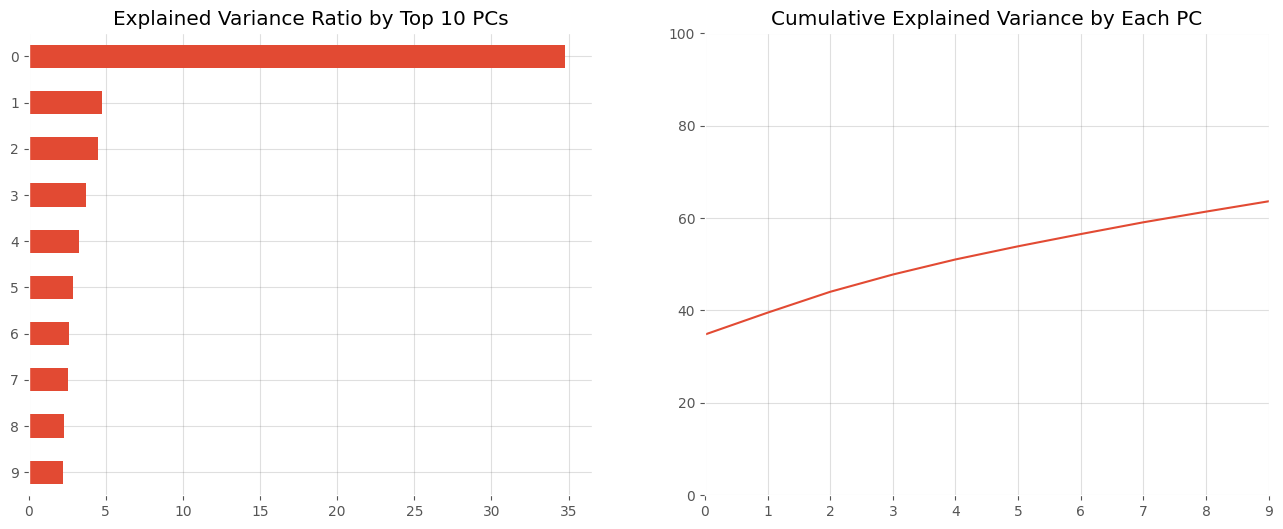

In [24]:
fig, axes =\
(
    plt
    .subplots(ncols = 2,
              figsize = [16, 6]
             )
)

# Plot on the left panel

Series1 =\
(
    pd
    .Series(pca
            .explained_variance_ratio_[ :NumEigenValues]
           )
    .sort_values()
    * 100
)

# Plot on the right panel

Series2 =\
(
    pd
    .Series(pca
            .explained_variance_ratio_[ :NumEigenValues]
           )
    .cumsum()
    * 100
)

(
    Series1
    .plot
    .barh(ylim = (0, 9),
          title = "Explained Variance Ratio by Top 10 PCs",
          ax = axes[0]
         )
)

(
    Series2
    .plot(ylim = (0, 100),
          xlim = (0, 9),
          title = "Cumulative Explained Variance by Each PC",
          ax = axes[1]
         )
)

In [25]:
(
    pd
    .Series(np
           .cumsum(pca
                   .explained_variance_ratio_)
           )
    .to_frame("Explained Variance")
    .head(NumEigenValues)
    .style
    .format("{:,.2%}".format)
)

,Explained Variance
0,34.79%
1,39.53%
2,44.04%
3,47.78%
4,51.04%
5,53.89%
6,56.54%
7,59.09%
8,61.39%
9,63.63%


In [26]:
pca.components_

array([[ 0.182,  0.208,  0.162, ...,  0.137,  0.162,  0.188],
       [-0.124,  0.07 , -0.241, ...,  0.223, -0.01 , -0.034],
       [-0.121,  0.063,  0.279, ...,  0.151,  0.011,  0.276],
       ...,
       [-0.044, -0.085,  0.034, ..., -0.069, -0.041, -0.205],
       [ 0.018,  0.136,  0.147, ...,  0.061, -0.033, -0.267],
       [ 0.021,  0.732, -0.032, ..., -0.024, -0.001, -0.09 ]])

In [27]:
def PCWeights():

    weights = pd.DataFrame()

    for i in range(len(pca.components_)
                  ):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i]
                                                                  )

    weights = weights.values.T
    return weights # Team, be careful with indentation

In [28]:
weights = PCWeights()

In [29]:
weights

array([[ 3.156e-02,  3.616e-02,  2.811e-02, ...,  2.377e-02,  2.814e-02,
         3.267e-02],
       [-2.885e-01,  1.620e-01, -5.603e-01, ...,  5.182e-01, -2.389e-02,
        -7.926e-02],
       [ 6.519e-01, -3.391e-01, -1.498e+00, ..., -8.138e-01, -5.659e-02,
        -1.483e+00],
       ...,
       [-1.652e+00, -3.188e+00,  1.267e+00, ..., -2.585e+00, -1.528e+00,
        -7.728e+00],
       [ 2.096e+01,  1.612e+02,  1.739e+02, ...,  7.193e+01, -3.925e+01,
        -3.171e+02],
       [-2.487e-01, -8.833e+00,  3.827e-01, ...,  2.894e-01,  1.023e-02,
         1.084e+00]])

In [30]:
# Set the number of principal components to be considered
NumComponents = 4

# Extract the top principal components from the PCA object
# and create a DataFrame with columns named after the original features

topPortfolios =\
(
    pd
    .DataFrame(pca.components_[ : NumComponents],
               columns = portfolio_df.columns)
)

# Normalize the weights of the top portfolios such that the weights sum up to 1 for each portfolio
# This is done by dividing each weight by the sum of weights for the respective portfolio

eigen_portfolios =\
(
    topPortfolios
    .div(topPortfolios.sum(1),
         axis = 0)
)

# Rename the index of the eigen_portfolios DataFrame for better readability

eigen_portfolios.index = [f"Portfolio {i}" for i in range(NumComponents)
                         ]

# Calculate the square root of the explained variance for each component
# This provides the standard deviation of returns for each eigenportfolio

np.sqrt(pca.explained_variance_)

array([3.456, 1.275, 1.245, 1.133, 1.059, 0.989, 0.953, 0.936, 0.89 ,
       0.876, 0.864, 0.846, 0.835, 0.826, 0.817, 0.807, 0.785, 0.778,
       0.773, 0.75 , 0.748, 0.731, 0.723, 0.7  , 0.691, 0.679, 0.665,
       0.637, 0.623, 0.607, 0.586, 0.574, 0.565, 0.547])

In [31]:
eigen_portfolios

Ticker,ADSK,ALL,BKR,BLDR,CI,CPT,CSGP,D,DLTR,DVA,...,REGN,SPGI,STZ,SWKS,TPR,UNH,UNP,VZ,WTW,XOM
Portfolio 0,0.031556,0.036157,0.028114,0.029625,0.026857,0.029183,0.030833,0.024041,0.017842,0.023444,...,0.021637,0.033195,0.028203,0.028593,0.027451,0.026603,0.033715,0.023770,0.028142,0.032673
Portfolio 1,-0.288498,0.162012,-0.560281,-0.458951,0.211876,0.509209,-0.037983,1.061218,0.196880,0.296065,...,-0.025439,-0.005450,0.306859,-0.407965,-0.265544,0.378215,-0.212993,0.518154,-0.023889,-0.079258
Portfolio 2,0.651867,-0.339124,-1.498446,0.235755,1.048328,-0.536732,0.677937,-1.367747,1.394333,0.603233,...,1.813180,0.639093,0.221663,0.942333,0.551824,1.137038,-0.362613,-0.813791,-0.056586,-1.482505
Portfolio 3,1.063853,-1.098331,-0.778645,1.502941,-4.303838,1.458640,0.949353,0.867811,1.884359,-1.728338,...,0.946223,0.278581,0.627618,0.433655,1.635094,-4.334941,0.170373,0.146197,0.294010,-1.177563


array([[<Axes: title={'center': 'Portfolio 0'}, xlabel='Ticker'>],
       [<Axes: title={'center': 'Portfolio 1'}, xlabel='Ticker'>],
       [<Axes: title={'center': 'Portfolio 2'}, xlabel='Ticker'>],
       [<Axes: title={'center': 'Portfolio 3'}, xlabel='Ticker'>]],
      dtype=object)

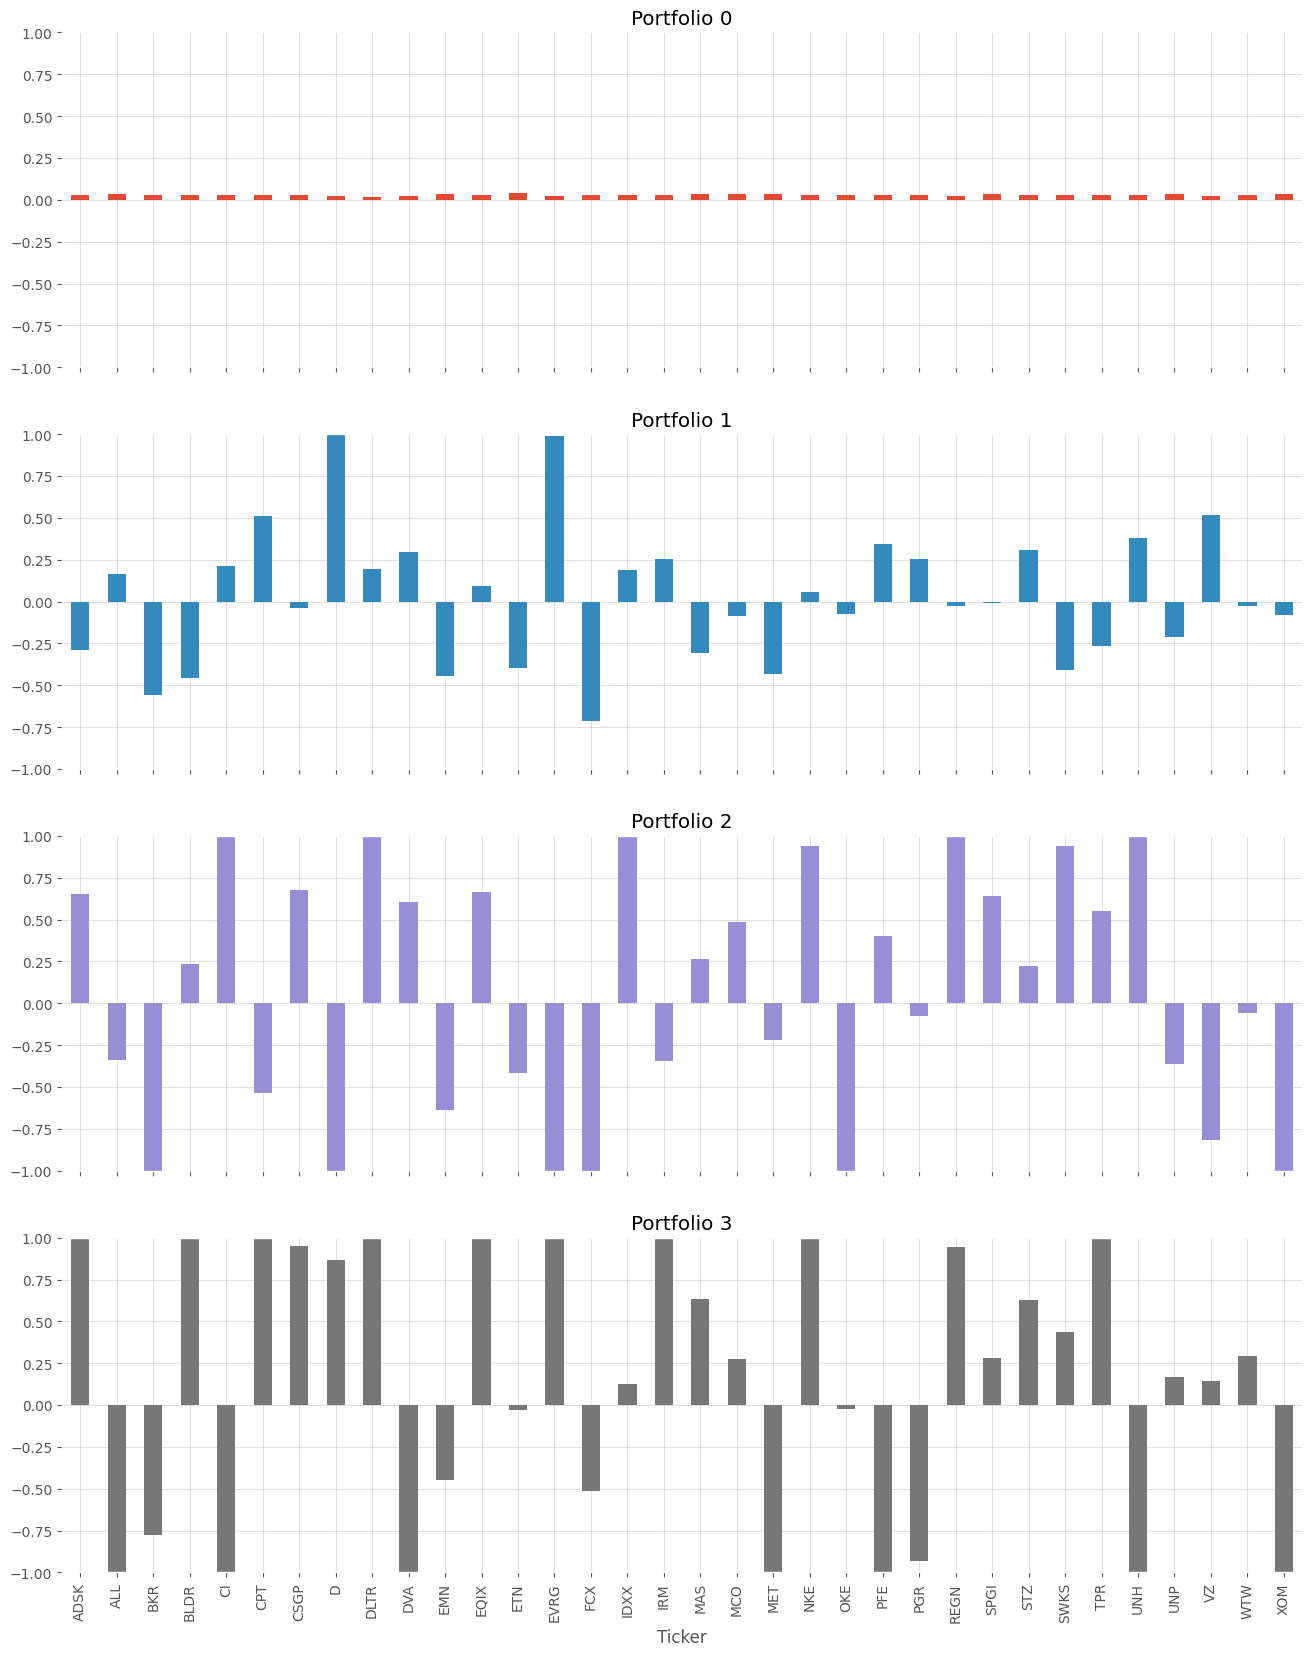

In [32]:
(
    eigen_portfolios
    .T  # Transpose the DataFrame to have portfolios as columns and assets as rows
    .plot
    .bar(subplots = True,
         layout = (int(NumComponents), 1),
         legend = False,
         sharey = True,
         figsize = [16, 20],
         ylim = [-1, 1]
        )
)

In [33]:
def calculate_sharpe_ratio(ts_returns, periods_per_year = 252):

    n_years = ts_returns.shape[0] / periods_per_year

    annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)
                                ) - 1

    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)

    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

In [34]:
def valid_backtest_PCA_porfolios(eigen):
    
    eigen_prtfi =\
        (
            pd
            .DataFrame(data = {"weights": eigen.squeeze()
                              },
                       index = stock_tickers)
        )

    # Sanity Check: Ensure the order of tickers in X_Test_Raw matches the order in eigen
    if not list(eigen_prtfi.index) == list(X_Test_Raw.columns): 
        raise ValueError("Sanity check failed: Mismatch in number of tickers between X_Test_Raw and eigen.")
    else:
        print("Prof. Roh's Message: 'Sanity check succeeded :)' The order of tickers in X_Test_Raw matches the order in eigen.")
    
    # Let's directly compute the dot product without sorting
    eigen_prtfi_returns =\
    (
        np
        .dot(X_Test_Raw, eigen)
    )
    
    eigen_portfolio_returns =\
    (
        pd
        .Series(eigen_prtfi_returns.squeeze(),
                index = X_Test_Raw.index)
    )

    returns, vol, sharpe = calculate_sharpe_ratio(eigen_portfolio_returns)

    print("Our PCA-based Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f"  %
          (returns * 100, vol * 100, sharpe)
         )

    # Compared with what? Equal-weightage Portfolio

    equal_weight_return =\
    (
        X_Test_Raw * (1 / len(pca.components_)
                     )
    ).sum(axis = 1)

    df_plot =\
        (
            pd
            .DataFrame({"ML Portfolio Return": eigen_portfolio_returns,
                        "Equal Weight Index": equal_weight_return},
                      index = X_Test.index
                      )
        )

    (
        np
        .cumprod(df_plot + 1)
        .plot(title = "Returns of the equal weighted index vs. Eigen-Portfolio",
              figsize = [16, 8]
             )
    )

    plt.show()

### <font color = red> Answer 1 is presented in the cell below: </font>

Prof. Roh's Message: 'Sanity check succeeded :)' The order of tickers in X_Test_Raw matches the order in eigen.
Our PCA-based Portfolio:
Return = -2.76%
Volatility = 81.95%
Sharpe = -0.03


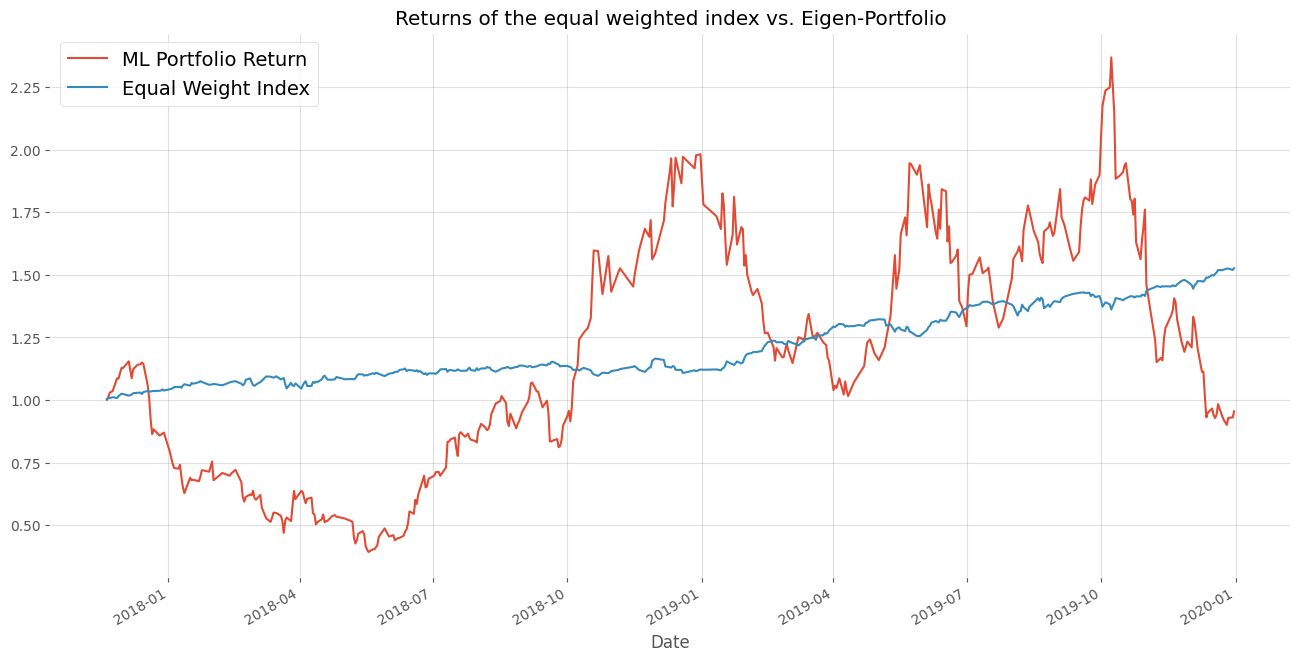

In [35]:
valid_backtest_PCA_porfolios(eigen = weights[1]
                             )

## 👇 <font color = "purple"> Bigger Question 2. The next question is to look for clusters of correlations using the agglomerate hierarchical clustering technique (AGNES).

> The primary advantage AGNES has over other clustering methods is that you don’t need to guess how many clusters there might be.
    
> Agglomerate Clustering first assigns each data point into its own cluster, and gradually merges clusters until only one remains. It’s then up to a quant to choose a cut-off threshold and decide how many clusters are present.

> Linkage does the actual clustering in one line of code, and returns a list of the clusters.

> There are different options for measuring the distance. We will choose the average distance measurement option, but others are possible (ward, single, centroid, etc.).

### The best way to visualize an agglomerate clustering algorithm is through a dendrogram, which displays a cluster tree, the leaves being the individual stocks and the root being the final single cluster. 
    
### The distance between each cluster is shown on the y-axis, and thus the longer the branches are, the less correlated two clusters are.
    
### <font color = green> Using Dow data, based on what you learned in class, run the above analysis and come up with a dendrogram. According to the dendrogram, which of the stocks are most correlated? Also based on the dendrogram, please identify two stocks that are not well correlated.

### Below are the lines of code that lead to an answer:

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage, ward
from scipy.cluster.hierarchy import fcluster

In [37]:
dow =\
(
    pd
    .read_csv("https://talktoroh.squarespace.com/s/dow_pca-hemx.csv",
              index_col = 0)
)

In [38]:
missing_values =\
(
    dow
    .isnull() # True (1) vs. False (0)
    .mean()
    .sort_values(ascending = False)
)

missing_values.head(10)

DWDP    0.925208
V       0.429792
MMM     0.000000
JPM     0.000000
WMT     0.000000
VZ      0.000000
UNH     0.000000
UTX     0.000000
TRV     0.000000
PG      0.000000
dtype: float64

In [39]:
drop_list =\
(
    sorted(list(missing_values[missing_values > 0.30]
                .index)
          )
)

dow =\
(
    dow
    .drop(labels = drop_list,
          axis = 1)
)

# check number of columns
dow.shape[1] == 30 - 2

True

In [40]:
dow =\
(
    dow
    .fillna(method = "ffill")
)

dow =\
(
    dow
    .dropna(axis = 0)
)

dow.shape

(4800, 28)

In [41]:
dow

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847043,35.476634,3.530576,26.650218,14.560887,21.582046,43.003876,16.983583,23.522220,23.862240,...,38.135101,4.701180,16.746856,32.227726,20.158885,21.319030,5.841355,22.564221,47.337599,21.713237
2000-01-04,28.661131,34.134275,3.232839,26.610431,14.372251,21.582046,40.577200,17.040950,24.899860,23.405167,...,36.846046,4.445214,16.121738,31.596399,19.890099,20.445803,5.766368,21.833915,45.566248,20.907354
2000-01-05,30.122175,33.959430,3.280149,28.473758,14.914205,22.049145,40.895453,17.228147,25.781550,24.569179,...,37.235380,4.702157,16.415912,31.325831,20.085579,20.254784,5.753327,22.564221,44.503437,21.097421
2000-01-06,31.877325,33.959430,2.996290,28.553331,15.459153,22.903343,39.781569,17.210031,24.899860,25.958680,...,35.988857,4.677733,16.972739,32.438168,20.122232,20.998392,5.964159,22.449405,45.126952,20.527220
2000-01-07,32.509812,34.433913,3.138219,29.382213,15.962182,23.305926,42.128682,18.342270,24.506249,25.882501,...,36.459983,4.677733,18.123166,35.023602,20.922479,21.830687,6.662948,22.282692,48.535033,21.051805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-25,195.900000,100.770000,157.760000,364.200000,136.860000,113.220000,46.130000,47.370000,111.090000,71.720000,...,107.170000,80.610000,40.298248,93.600000,124.980000,115.810000,268.050000,56.400000,96.940000,71.890000
2019-01-28,193.200000,100.380000,156.300000,362.970000,124.370000,112.170000,45.750000,47.170000,110.810000,71.240000,...,105.080000,80.320000,39.197582,93.520000,125.030000,115.080000,266.770000,55.070000,97.060000,71.580000
2019-01-29,196.950000,100.960000,154.680000,364.910000,126.530000,111.830000,45.960000,47.400000,110.900000,71.510000,...,102.940000,80.220000,40.427155,93.540000,124.820000,117.840000,267.340000,53.280000,96.710000,71.500000


In [42]:
#Calculate average annual percentage return and volatilities over a theoretical one year period

returns =\
(
    dow
    .pct_change()
    .mean() 
    * 252
)

returns = pd.DataFrame(returns)

returns.columns = ["Returns"]

In [43]:
returns["Volatility"] =\
(    
     dow
    .pct_change()
    .std() 
    * np.sqrt(252)
)

In [44]:
data = returns.copy()

In [45]:
# You may format the data as a numpy array to feed into the K-Means algorithm

# transpose to have 2 columns and 498 rows
data =\
( 
    np 
    .asarray([np.asarray(returns['Returns']),
              np.asarray(returns['Volatility'])
             ]
            )
    .T
)

In [46]:
data

array([[0.126, 0.23 ],
       [0.119, 0.355],
       [0.29 , 0.409],
       [0.185, 0.3  ],
       [0.168, 0.322],
       [0.12 , 0.254],
       [0.081, 0.391],
       [0.076, 0.206],
       [0.126, 0.299],
       [0.088, 0.241],
       [0.121, 0.371],
       [0.122, 0.309],
       [0.06 , 0.259],
       [0.095, 0.371],
       [0.099, 0.191],
       [0.147, 0.392],
       [0.131, 0.23 ],
       [0.08 , 0.271],
       [0.1  , 0.306],
       [0.195, 0.3  ],
       [0.08 , 0.248],
       [0.08 , 0.21 ],
       [0.137, 0.289],
       [0.126, 0.266],
       [0.25 , 0.314],
       [0.077, 0.247],
       [0.065, 0.239],
       [0.101, 0.275]])

In [47]:
scaler = StandardScaler().fit(data)

In [48]:
rescaledDataset =\
(
    pd
    .DataFrame(scaler.fit_transform(returns),
               columns = returns.columns, 
               index = returns.index)
)
rescaledDataset.head()

,Returns,Volatility
MMM,0.060722,-1.009566
AXP,-0.084588,1.115765
AAPL,3.153598,2.042296
BA,1.174373,0.182784
CAT,0.846008,0.552976


In [49]:
# summarize transformed data
X = rescaledDataset
X.head()

,Returns,Volatility
MMM,0.060722,-1.009566
AXP,-0.084588,1.115765
AAPL,3.153598,2.042296
BA,1.174373,0.182784
CAT,0.846008,0.552976


In [50]:
#Calulate linkage
Z = linkage(X, 
            method = "average")    # ward
Z[0]

array([20.   , 25.   ,  0.044,  2.   ])

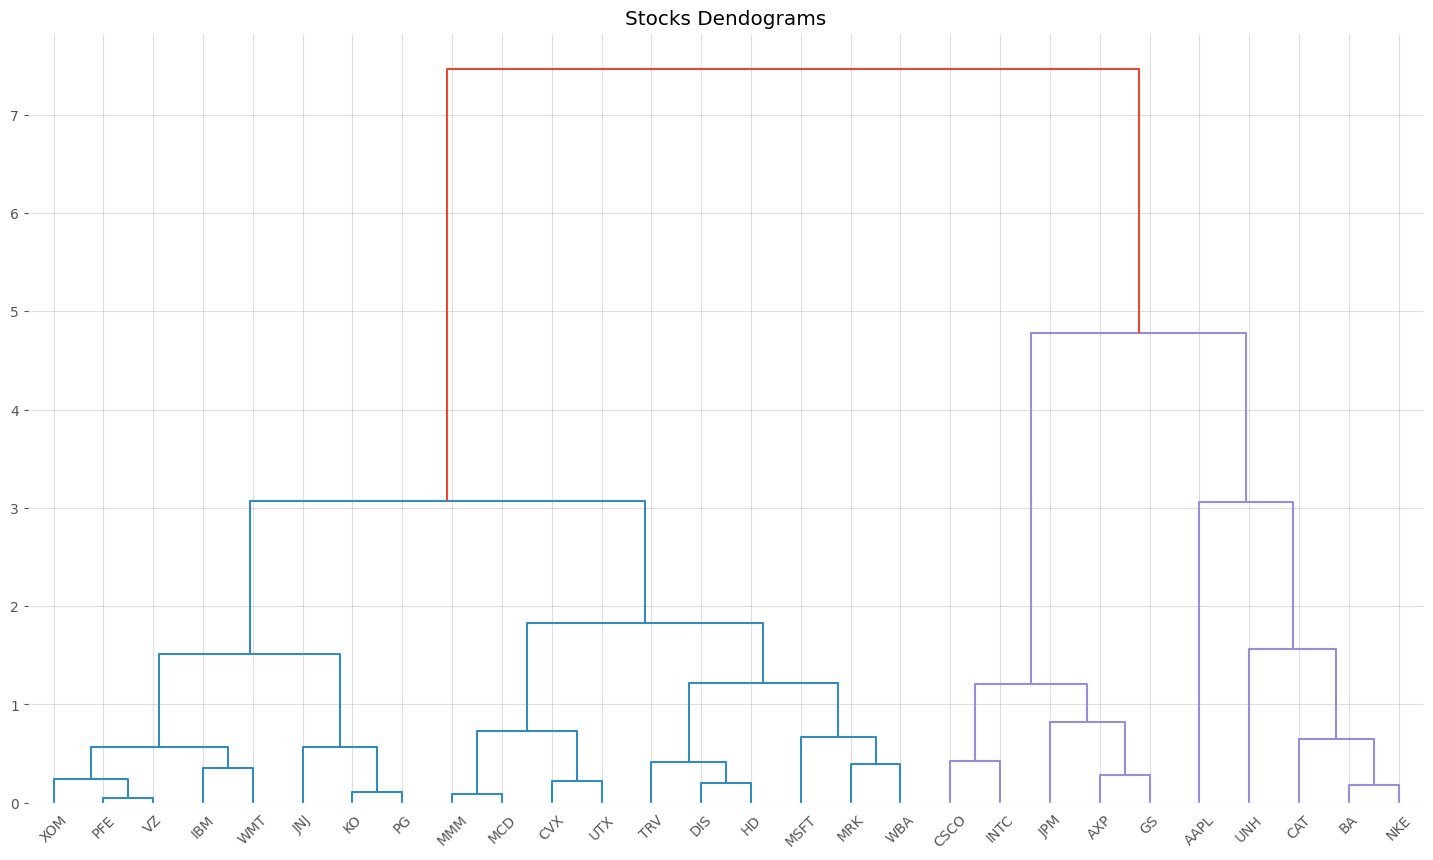

In [51]:
# Plot Dendogram

plt.figure(figsize=(18, 10)
          )
plt.title("Stocks Dendograms")

dendrogram(Z, labels = X.index)

plt.show()

In [52]:
distance_threshold = 1

clusters = fcluster(Z, distance_threshold, criterion='distance')

chosen_clusters = pd.DataFrame(data=clusters, 
                               columns=['cluster']
                              )

chosen_clusters['cluster'].unique()

array([ 3,  7, 10,  8,  6,  2,  4,  1,  5,  9], dtype=int32)

### <font color = red> Answer 2 is presented in the cell below: </font>

## <font color = blue> 👉 Questions 3 to 7 ask you to build, execute, and backtest a strategy, using both `MACD` and `RSI`. </font>

### <font color = green> Please combine the RSI and MACD strategies and own the stock if both RSI and MACD criteria provide a signal to buy. As to RSI, you will generalize the RSI threshold values to 50.

#### You are asked to build a trading strategy with the following set of rules.

### <font color = green> NOTE: Microsoft (`MSFT`) is our security of interest. The `investment horizon` will be three years between 2015 and 2017; your `capital` is USD 100,000; and there is a USD 5 flat `commission fee` per trade.

- You can go long and short.
<br>

- To calculate RSI, use 14 periods (trading days).
<br>

- Enter a long position under a condition where RSI is below 50 and, at the same time, bullish crossover based on MACD is accomplished.
<br>
    
- Enter a short position under a condition where RSI is above 50 and, at the same time, bearish crossover based on MACD is accomplished.

### <font color = green> NOTE: The MACD crossover strategy is defined as:    
    
- A `bullish` crossover arises when the MACD line turns `upward and crosses` beyond the MACD signal line.
- A `bearish` crossover arises when the MACD line turns `downward and crosses` under the MACD signal line.        
<br>

- The MACD is defined as the `difference` between the `12`-day ***exponential*** moving average and the `26`-day exponential moving average.
- The MACD signal line is then defined as the `9`-day ***exponential*** moving average of the MACD.
    
### <font color = green> NOTE: The RSI is defined as follows:
    
### Calculating the RSI first requires the RS which requires an average value of n-many previous trading days. 
<br>
    
- As discussed, a value of 14 days is common for the RSI calculation. 
<br>
    
- The first RS value requires the price from all 14 of the first trading days. Often, this is a source of confusion with the RSI given successive values only require the most recent. 
   
    
    Step 1. For 14 periods, calculate the difference in price from the current period 
    and the previous period
    
    Step 2. For each period, record each positive change in price as a gain and 
    each negative change as a loss
    
    Step 3. On the 14th period, calculate the arithmetic mean of the gains and losses for 
    the entire 14 day period (e.g. gains / 14 & losses / 14)
    
    Step 4. Use these values to calculate the RS
    
### <center> $ RS = \frac{AverageGain}{AverageLoss} $
    
    Step 5. Use the RS value to calculate the RSI
    
    Step 6. For each proceeding period, use only the previous RSI value 
    to calculate the nextaverage value by multiplying by our lookback 
    period – 1 (e.g., 13 for a lookback of 14).
    
    Step 7. Add the value obtained in Step 6 to the current day’s value 
    (run this for both the gains and losses)
    
### <center> $ RSI = 100 - \frac{100}{1 + RS} $

### Visualize your buy and sell positions.

### Below are the lines of code that lead to an answer:

In [53]:
TA_start = "2015-01-01"
TA_end = "2018-01-01"

Initial_Capital = 100000
Commission = 5

In [54]:
RSI_lookback = 14
RSI_upper = 50
RSI_lower = 50
RSI_middle = 50

MACD_slow=26
MACD_fast=12
MACD_signal_line=9

In [55]:
TA_ticker = ["MSFT"]

TA_stock_data = yf.download(TA_ticker, 
                             start=TA_start, 
                             end=TA_end)

[*********************100%%**********************]  1 of 1 completed


In [56]:
TA_stock_data = TA_stock_data[["Adj Close"]]

In [57]:
TA_stock_data["Returns"] = \
    (
        TA_stock_data["Adj Close"]
        .pct_change()               #should this be pct_change or diff?
    )

TA_stock_data["Positive_Returns"] = \
    (
        np.where(TA_stock_data["Returns"] >0, 
                 TA_stock_data["Returns"], 
                 0)
    )

TA_stock_data["Negative_Returns"] = \
    (
        np.where(TA_stock_data["Returns"] <0, 
                 abs(TA_stock_data["Returns"]), 
                 0)
    )

In [58]:
# Initialize columns for RS and RSI
TA_stock_data["RS"] = np.nan
TA_stock_data["RSI"] = np.nan

# Compute the initial average gain and loss for the first RSI value
initial_gain = \
    (
        TA_stock_data["Positive_Returns"]
        .rolling(RSI_lookback)
        .mean()
    )
    
initial_loss = \
    (
        TA_stock_data["Negative_Returns"]
        .rolling(RSI_lookback)
        .mean()
    )

# Calculate RS and RSI for the first RSI_lookback window
TA_stock_data.iloc[RSI_lookback, TA_stock_data.columns.get_loc("RS")] = \
    (
        initial_gain.iloc[RSI_lookback] 
        / 
        initial_loss.iloc[RSI_lookback]
    )
    
TA_stock_data.iloc[RSI_lookback, TA_stock_data.columns.get_loc("RSI")] = \
    (
        100 
        -
        (
            100
            /
            (1 + TA_stock_data.iloc[RSI_lookback, TA_stock_data.columns.get_loc("RS")])
        )
    )

# Loop to calculate RSI for all subsequent days (using smoothed averages)
for row in range(RSI_lookback + 1, len(TA_stock_data)):
    
    gain = TA_stock_data.iloc[row, TA_stock_data.columns.get_loc("Positive_Returns")]
    loss = TA_stock_data.iloc[row, TA_stock_data.columns.get_loc("Negative_Returns")]

    # Smoothed average gain and loss using exponential decay
    previous_gain = initial_gain.iloc[row - 1]
    previous_loss = initial_loss.iloc[row - 1]

    smoothed_gain = (previous_gain * (RSI_lookback - 1) + gain) / RSI_lookback
    smoothed_loss = (previous_loss * (RSI_lookback - 1) + loss) / RSI_lookback

    # Update RS and RSI
    TA_stock_data.iloc[row, TA_stock_data.columns.get_loc("RS")] = smoothed_gain / smoothed_loss
    
    TA_stock_data.iloc[row, TA_stock_data.columns.get_loc("RSI")] = \
        (
            100 
            - 
            (
                100 
                / 
                (1 + TA_stock_data.iloc[row, TA_stock_data.columns.get_loc("RS")])
            )
        )

In [59]:
TA_stock_data

,Adj Close,Returns,Positive_Returns,Negative_Returns,RS,RSI
Date,,,,,,
2015-01-02,40.232841,NaN,0.000000,0.000000,NaN,NaN
2015-01-05,39.862877,-0.009196,0.000000,0.009196,NaN,NaN
2015-01-06,39.277805,-0.014677,0.000000,0.014677,NaN,NaN
2015-01-07,39.776836,0.012705,0.012705,0.000000,NaN,NaN
2015-01-08,40.946987,0.029418,0.029418,0.000000,NaN,NaN
...,...,...,...,...,...,...
2017-12-22,79.384422,0.000117,0.000117,0.000000,1.241986,55.396687
2017-12-26,79.282303,-0.001286,0.000000,0.001286,2.701363,72.982926
2017-12-27,79.570091,0.003630,0.003630,0.000000,2.632818,72.473162


In [60]:
TA_stock_data["Slow"]=TA_stock_data["Adj Close"].ewm(span=MACD_slow).mean()
TA_stock_data["Fast"]=TA_stock_data["Adj Close"].ewm(span=MACD_fast).mean()
TA_stock_data["MACD"]=TA_stock_data["Fast"]-TA_stock_data["Slow"]
TA_stock_data["MACD_Signal"]=TA_stock_data["MACD"].ewm(span=MACD_signal_line).mean()

In [61]:
TA_stock_data["Position"] =\
    (
        np.where(
            (TA_stock_data["MACD"] > TA_stock_data["MACD_Signal"]) 
            & 
            (TA_stock_data["RSI"]<RSI_middle),
            1,
            0)
    )

In [62]:
TA_stock_data["Position"] =\
    (
        np.where(
            (TA_stock_data["MACD"] < TA_stock_data["MACD_Signal"]) 
            & 
            (TA_stock_data["RSI"]>RSI_middle),
            -1,
            TA_stock_data["Position"])
    )

In [63]:
TA_stock_data["Trades"] =\
(
    TA_stock_data["Position"]
    .diff()
)

In [64]:
TA_stock_data

,Adj Close,Returns,Positive_Returns,Negative_Returns,RS,RSI,Slow,Fast,MACD,MACD_Signal,Position,Trades
Date,,,,,,,,,,,,
2015-01-02,40.232841,NaN,0.000000,0.000000,NaN,NaN,40.232841,40.232841,0.000000,0.000000,0,NaN
2015-01-05,39.862877,-0.009196,0.000000,0.009196,NaN,NaN,40.040744,40.032444,-0.008300,-0.004611,0,0.0
2015-01-06,39.277805,-0.014677,0.000000,0.014677,NaN,NaN,39.766628,39.737908,-0.028720,-0.014492,0,0.0
2015-01-07,39.776836,0.012705,0.012705,0.000000,NaN,NaN,39.769482,39.750196,-0.019285,-0.016116,0,0.0
2015-01-08,40.946987,0.029418,0.029418,0.000000,NaN,NaN,40.042550,40.075360,0.032810,-0.001561,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,79.384422,0.000117,0.000117,0.000000,1.241986,55.396687,78.182696,79.078365,0.895669,0.898259,-1,-1.0
2017-12-26,79.282303,-0.001286,0.000000,0.001286,2.701363,72.982926,78.264149,79.109740,0.845591,0.887725,-1,0.0
2017-12-27,79.570091,0.003630,0.003630,0.000000,2.632818,72.473162,78.360885,79.180563,0.819678,0.874116,-1,0.0


### <font color = red> Answer 3 is presented in the cell below: </font>

In [65]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=TA_stock_data.index, 
        y=TA_stock_data["Adj Close"], 
        mode='lines', 
        line=dict(color='grey', width=0.75), 
        name='Adj Close'
    )
)

fig.add_trace(
    go.Scatter(
        x=TA_stock_data.index, 
        y=TA_stock_data["Position"], 
        mode='lines', 
        line=dict(color='orange', width=0.75), 
        name='Position',
        yaxis='y2'  # Assign to secondary axis
    )
)

fig.update_layout(
    title='Stock Price, Indicators, and Position',
    xaxis_title='Date',
    yaxis_title='Stock Price',
    yaxis2=dict(
        title="Position", 
        overlaying='y', 
        side='right'
    ),
    width=1200,  
    height=600,  
    legend=dict(
        x=0.5,
        y=1.15,
        xanchor='center',
        yanchor='top',
        orientation='h',
        traceorder='normal',
        bordercolor='Black',
        borderwidth=1
    )
)

# Show figure
fig.show()

In [66]:
fig = go.Figure()

# Plot the Adjusted Close price as a line
fig.add_trace(
    go.Scatter(
        x=TA_stock_data.index, 
        y=TA_stock_data["Adj Close"], 
        mode='lines', 
        line=dict(color='grey', width=0.75), 
        name='Adj Close'
    )
)

# Plot the BUY signals (1.0 or 2.0 in Trades column)
fig.add_trace(
    go.Scatter(
        x=TA_stock_data.loc[TA_stock_data["Trades"].isin([1.0, 2.0])].index, 
        y=TA_stock_data.loc[TA_stock_data["Trades"].isin([1.0, 2.0]), "Adj Close"], 
        mode='markers', 
        marker=dict(symbol='triangle-up', color='green', size=10), 
        name='BUY Signal'
    )
)

# Plot the SELL signals (-1.0 or -2.0 in Trades column)
fig.add_trace(
    go.Scatter(
        x=TA_stock_data.loc[TA_stock_data["Trades"].isin([-1.0, -2.0])].index, 
        y=TA_stock_data.loc[TA_stock_data["Trades"].isin([-1.0, -2.0]), "Adj Close"], 
        mode='markers', 
        marker=dict(symbol='triangle-down', color='red', size=10), 
        name='SELL Signal'
    )
)

# Update layout for better presentation
fig.update_layout(
    title='Stock Price with Buy/Sell Signals',
    xaxis_title='Date',
    yaxis_title='Stock Price',
    width=1200,  
    height=600
)

# Show the figure
fig.show()

### <font color = blue> 👉 Question 4</font>. How much in cumulative returns could you have had as a result of the RSI strategy?

### Below are the lines of code that lead to an answer:

In [67]:
TA_stock_data

,Adj Close,Returns,Positive_Returns,Negative_Returns,RS,RSI,Slow,Fast,MACD,MACD_Signal,Position,Trades
Date,,,,,,,,,,,,
2015-01-02,40.232841,NaN,0.000000,0.000000,NaN,NaN,40.232841,40.232841,0.000000,0.000000,0,NaN
2015-01-05,39.862877,-0.009196,0.000000,0.009196,NaN,NaN,40.040744,40.032444,-0.008300,-0.004611,0,0.0
2015-01-06,39.277805,-0.014677,0.000000,0.014677,NaN,NaN,39.766628,39.737908,-0.028720,-0.014492,0,0.0
2015-01-07,39.776836,0.012705,0.012705,0.000000,NaN,NaN,39.769482,39.750196,-0.019285,-0.016116,0,0.0
2015-01-08,40.946987,0.029418,0.029418,0.000000,NaN,NaN,40.042550,40.075360,0.032810,-0.001561,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,79.384422,0.000117,0.000117,0.000000,1.241986,55.396687,78.182696,79.078365,0.895669,0.898259,-1,-1.0
2017-12-26,79.282303,-0.001286,0.000000,0.001286,2.701363,72.982926,78.264149,79.109740,0.845591,0.887725,-1,0.0
2017-12-27,79.570091,0.003630,0.003630,0.000000,2.632818,72.473162,78.360885,79.180563,0.819678,0.874116,-1,0.0


In [68]:
TA_stock_data["log_returns"] =\
(
    np
    .log(TA_stock_data["Adj Close"] / TA_stock_data["Adj Close"].shift(1)
        )
)

TA_stock_data["strategy_returns"] =\
(
    TA_stock_data["Position"]
    .shift(1) 
    * 
    TA_stock_data["log_returns"]
)

TA_stock_data["strategy_cumulative_returns"] = TA_stock_data["strategy_returns"].cumsum().apply(np.exp)

TA_stock_data.dropna(inplace=True)

TA_stock_data["Capital"]=np.nan

# Set the first value of Capital to the initial value (initial_capital)
TA_stock_data.iloc[0, TA_stock_data.columns.get_loc("Capital")] = Initial_Capital 

for row in range(1, len(TA_stock_data)):
    
    Trade=abs(TA_stock_data.iloc[row, TA_stock_data.columns.get_loc("Trades")])

    # Update the capital based on the previous capital and strategy returns
    TA_stock_data.iloc[row, TA_stock_data.columns.get_loc("Capital")] = TA_stock_data.iloc[row-1, TA_stock_data.columns.get_loc("Capital")] * \
        (np.exp(TA_stock_data.iloc[row, TA_stock_data.columns.get_loc("strategy_returns")])) - Trade * Commission

Final_Capital=TA_stock_data.iloc[-1, TA_stock_data.columns.get_loc("Capital")]

In [69]:
print (f"The final capital of a strategy on {TA_ticker} over this time period with starting capital of ${Initial_Capital} is ${Final_Capital:.2f}")

The final capital of a strategy on ['MSFT'] over this time period with starting capital of $100000 is $92991.60


In [70]:
Returns = (Final_Capital/Initial_Capital -1)*100

In [71]:
print (f"The returns of a strategy on {TA_ticker} over this time period is {Returns:.2f}%")

The returns of a strategy on ['MSFT'] over this time period is -7.01%


### <font color = red> Answer 4 </font>

    The answer is -7.01 % .

### <font color = blue> 👉 Question 5</font>. Now please find the `five` worst drawdown periods over the investment horizon and provide their net drawdown in % and duration, respectively.

### <font color = green> The question asks you to find the five worst drawdown periods, beyond identifying max drawdown (MDD).

### Below are the lines of code that lead to an answer:

In [72]:
df_drawdown =\
(
    TA_stock_data[["strategy_returns"]]
)

df_drawdown

,strategy_returns
Date,
2015-01-23,0.000000
2015-01-26,-0.000000
2015-01-27,-0.000000
2015-01-28,-0.000000
2015-01-29,0.000000
...,...
2017-12-22,0.000000
2017-12-26,0.001287
2017-12-27,-0.003623


<Axes: xlabel='Date'>

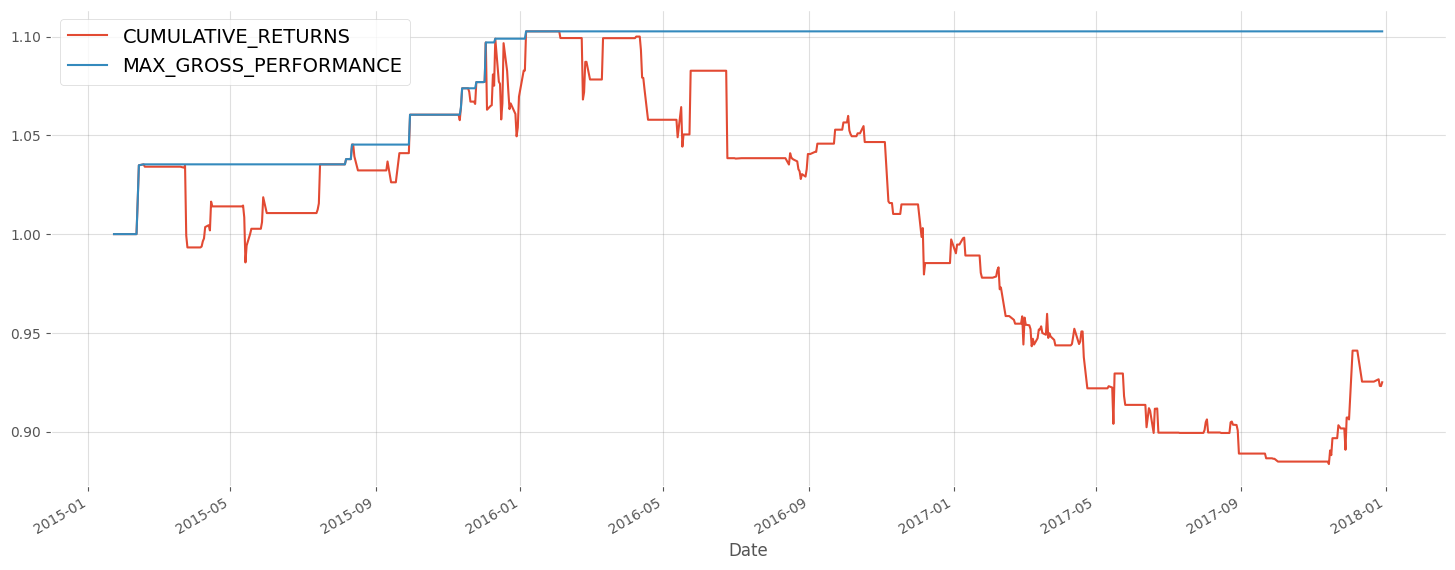

In [73]:
df_drawdown["CUMULATIVE_RETURNS"] =\
(
    (1+df_drawdown["strategy_returns"]).cumprod()
)

df_drawdown["MAX_GROSS_PERFORMANCE"]=\
(
    df_drawdown
    ["CUMULATIVE_RETURNS"]
    .cummax()
)

(
    df_drawdown
    [["CUMULATIVE_RETURNS", "MAX_GROSS_PERFORMANCE"]]
).plot(figsize = [18, 7]
      )

In [74]:
df_drawdown

,strategy_returns,CUMULATIVE_RETURNS,MAX_GROSS_PERFORMANCE
Date,,,
2015-01-23,0.000000,1.000000,1.000000
2015-01-26,-0.000000,1.000000,1.000000
2015-01-27,-0.000000,1.000000,1.000000
2015-01-28,-0.000000,1.000000,1.000000
2015-01-29,0.000000,1.000000,1.000000
...,...,...,...
2017-12-22,0.000000,0.925317,1.102657
2017-12-26,0.001287,0.926509,1.102657
2017-12-27,-0.003623,0.923152,1.102657


In [75]:
df_drawdown["DRAWDOWN"] =\
(
    df_drawdown["MAX_GROSS_PERFORMANCE"] - df_drawdown["CUMULATIVE_RETURNS"]
)

In [76]:
df_drawdown[df_drawdown["DRAWDOWN"] == 0].index

DatetimeIndex(['2015-01-23', '2015-01-26', '2015-01-27', '2015-01-28',
               '2015-01-29', '2015-01-30', '2015-02-02', '2015-02-03',
               '2015-02-04', '2015-02-05', '2015-02-06', '2015-02-09',
               '2015-02-10', '2015-02-11', '2015-02-12', '2015-02-13',
               '2015-02-17', '2015-08-07', '2015-08-10', '2015-08-11',
               '2015-08-12', '2015-08-13', '2015-09-30', '2015-10-01',
               '2015-10-02', '2015-10-05', '2015-10-06', '2015-10-07',
               '2015-10-08', '2015-10-09', '2015-10-12', '2015-10-13',
               '2015-10-14', '2015-10-15', '2015-10-16', '2015-10-19',
               '2015-10-20', '2015-10-21', '2015-10-22', '2015-10-23',
               '2015-10-26', '2015-10-27', '2015-10-28', '2015-10-29',
               '2015-10-30', '2015-11-02', '2015-11-03', '2015-11-04',
               '2015-11-05', '2015-11-06', '2015-11-09', '2015-11-10',
               '2015-11-12', '2015-11-13', '2015-11-16', '2015-11-17',
      

In [77]:
df_drawdown

,strategy_returns,CUMULATIVE_RETURNS,MAX_GROSS_PERFORMANCE,DRAWDOWN
Date,,,,
2015-01-23,0.000000,1.000000,1.000000,0.000000
2015-01-26,-0.000000,1.000000,1.000000,0.000000
2015-01-27,-0.000000,1.000000,1.000000,0.000000
2015-01-28,-0.000000,1.000000,1.000000,0.000000
2015-01-29,0.000000,1.000000,1.000000,0.000000
...,...,...,...,...
2017-12-22,0.000000,0.925317,1.102657,0.177340
2017-12-26,0.001287,0.926509,1.102657,0.176149
2017-12-27,-0.003623,0.923152,1.102657,0.179506


In [78]:
Drawdown_Days = []
Drawdown_Amount = []

# Loop through recovery points
for i in range(len(df_drawdown[df_drawdown["DRAWDOWN"]==0].index)-1):
    # Calculate days between recovery points
    days = (df_drawdown[df_drawdown["DRAWDOWN"]==0].index[i+1]-df_drawdown[df_drawdown["DRAWDOWN"]==0].index[i]).days
    
    # Find the maximum drawdown in the period
    max_drawdown = df_drawdown.loc[df_drawdown[df_drawdown["DRAWDOWN"]==0].index[i]:df_drawdown[df_drawdown["DRAWDOWN"]==0].index[i+1]]["DRAWDOWN"].max()
    
    # Store the results
    Drawdown_Days.append(days)
    Drawdown_Amount.append(max_drawdown)

In [79]:
current_drawdown_period =\
(
    df_drawdown["DRAWDOWN"].index[-1].to_pydatetime()
    -
    df_drawdown["DRAWDOWN"][df_drawdown["DRAWDOWN"] == 0].index[-1].to_pydatetime()
).days

current_drawdown_period # returns timedelta

695

In [80]:
current_maximum_drawdown_amount = \
    (
        df_drawdown["DRAWDOWN"]
        .loc[df_drawdown[df_drawdown["DRAWDOWN"] == 0]
             .index[-1]:df_drawdown.index[-1]]
        .max()
    )

current_maximum_drawdown_amount

0.21909846221281937

In [81]:
# Store the results
Drawdown_Days.append(current_drawdown_period)
Drawdown_Amount.append(float(current_maximum_drawdown_amount))

In [82]:
drawdown = pd.DataFrame([Drawdown_Days,Drawdown_Amount]).T
drawdown.columns = ["days", "drawdown"]
drawdown.loc[drawdown["drawdown"].nlargest(5).index]

,days,drawdown
83,695.0,0.219098
16,171.0,0.049664
63,26.0,0.049447
62,8.0,0.034077
21,48.0,0.019099


In [83]:
drawdown.loc[drawdown["days"].nlargest(5).index]

,days,drawdown
83,695.0,0.219098
16,171.0,0.049664
21,48.0,0.019099
63,26.0,0.049447
62,8.0,0.034077


### <font color = red> Answer 5 </font>

    The Worst drawdown period     : Net drawdown ____________ % | Duration ____________ Days
    
    The 2nd worst drawdown period : Net drawdown ____________ % | Duration ____________ Days
     
    The 3rd worst drawdown period : Net drawdown ____________ % | Duration ____________ Days
         
    The 4th worst drawdown period : Net drawdown ____________ % | Duration ____________ Days
    
    The 5th worst drawdown period : Net drawdown ____________ % | Duration ____________ Days

### <font color = blue> 👉 Question 6</font>. Within the investment horizon, please calculate annual returns for each of the three years and then find the year that performs better than average vs. less than average annual returns.

### Below are the lines of code that lead to an answer:

In [84]:
Annual_Returns = {}
years = [2015, 2016, 2017]  # Add more years as needed

for year in years:
    start_date = dt.datetime(year, 1, 1)
    end_date = dt.datetime(year + 1, 1, 1)
    analysis_year = TA_stock_data.loc[start_date:end_date].copy()
    
    if not analysis_year.empty:
        start_capital = analysis_year["Capital"].iloc[0]
        end_capital = analysis_year["Capital"].iloc[-1]
        returns = (end_capital - start_capital) / start_capital
        Annual_Returns[str(year)] = returns
    else:
        Annual_Returns[str(year)] = None  # or handle missing data appropriately

In [85]:
Annual_Returns 

{'2015': 0.07268862734671885,
 '2016': -0.07738280236152627,
 '2017': -0.06529049429759096}

### <font color = red> Answer 6 </font>

    Below average year(s) : 2016,2017
    
    Above average year(s) : 2015
     

###  <font color = blue> 👉 Question 7. </font> What's the annualized Sharpe ratio of the current investment strategy?

### Below are the lines of code that lead to an answer:

In [86]:
TA_stock_data["Capital_Returns"] = \
    (
        TA_stock_data["Capital"]
        /
        TA_stock_data["Capital"]
        .shift(1)-1
    )

In [87]:
Sharpe =\
(
    (
     TA_stock_data["Capital_Returns"].mean() 
     / 
     TA_stock_data["Capital_Returns"].std()
    ) * np.sqrt(252)
)

Sharpe

-0.23197354827731675

### <font color = red> Answer 7 </font>
    
    Sharpe ratio: -0.2319
    

###  <font color = blue> 👉 Question 8. </font> Please compare the above Sharpe ratio deploying RSI-MACD combined strategy, relative to the Sharpe ratio utilizing MACD strategy only. Which investment strategy performs better based on the Sharpe ratio?

### Below are the lines of code that lead to an answer:

In [88]:
def MACD_Stock_Positions(Ticker:str , 
                         MACD_slow=MACD_slow, 
                         MACD_fast=MACD_fast, 
                         MACD_signal_line=MACD_signal_line, 
                         start=TA_start, 
                         end=TA_end):
    
    tickers=[Ticker]
    prices_df = yf.download(tickers, start=start, end=end)
    MACD_df = prices_df[["Adj Close"]]
    MACD_df["Slow"]=MACD_df["Adj Close"].ewm(span=MACD_slow).mean()
    MACD_df["Fast"]=MACD_df["Adj Close"].ewm(span=MACD_fast).mean()
    MACD_df["MACD"]=MACD_df["Fast"]-MACD_df["Slow"]
    MACD_df["MACD_Signal"]=MACD_df["MACD"].ewm(span=MACD_signal_line).mean()
    MACD_df["Position"] =(np.where(MACD_df["MACD"] > MACD_df["MACD_Signal"],1, -1))
    
    # Create a figure with two subplots (vertically arranged)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 10), gridspec_kw={'height_ratios': [3, 1]})

    # Plot the price and position on the first axis
    MACD_df[["Adj Close", "Position"]].plot(
        secondary_y="Position",
        style=["grey", "blue"],
        ax=ax1
    )
    ax1.set_title(f'{Ticker} Price and Position')
    ax1.legend(loc="upper left", shadow=True, fancybox=True)

    # Plot the MACD and MACD Signal on the second axis
    MACD_df[["MACD", "MACD_Signal"]].plot(
        style=["green", "red"],
        ax=ax2
    )
    ax2.set_title('MACD and Signal Line')
    ax2.axhline(0, color='black', linewidth=1)  # Add a horizontal line at MACD=0
    ax2.legend(loc="upper left", shadow=True, fancybox=True)

    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the plots
    plt.show()
    
    Ticker=MACD_df
    
    return Ticker

In [89]:
def MACD_Cumulative_Returns(Ticker:pd.DataFrame , Initial_Capital=Initial_Capital, Commission=Commission):
    Ticker["log_returns"] =(np.log(Ticker["Adj Close"] / Ticker["Adj Close"].shift(1)))
    Ticker["strategy_log_returns"] =(Ticker["Position"].shift(1) * Ticker["log_returns"])

    # Initialize the Capital column with NaN values
    Ticker["Capital"] = np.nan

    # Set the first value of Capital to the initial value (Initial_Capital )
    Ticker.iloc[0, Ticker.columns.get_loc("Capital")] = Initial_Capital 

    # Loop through each row starting from the second row to calculate capital
    for row in range(1, len(Ticker)):
        # Calculate the absolute difference in positions (trade detection)
        Trade = abs(Ticker.iloc[row, Ticker.columns.get_loc("Position")] - Ticker.iloc[row-1, Ticker.columns.get_loc("Position")])
        
        # Update the capital based on the previous capital and strategy returns
        Ticker.iloc[row, Ticker.columns.get_loc("Capital")] = Ticker.iloc[row-1, Ticker.columns.get_loc("Capital")] * \
            (np.exp(Ticker.iloc[row, Ticker.columns.get_loc("strategy_log_returns")])) - Trade * Commission
            
    Percentage_Return = (Ticker["Capital"][-1]/Initial_Capital - 1)*100
    
    print(f"The percentage cumulative return over this period is {Percentage_Return:.2f}%")
    
    return Ticker

In [90]:
def MACD_Sharpe(Ticker:pd.DataFrame):

    Sharpe = (Ticker["strategy_log_returns"].mean() / Ticker["strategy_log_returns"].std()) * np.sqrt(252)
    
    return Sharpe

[*********************100%%**********************]  1 of 1 completed


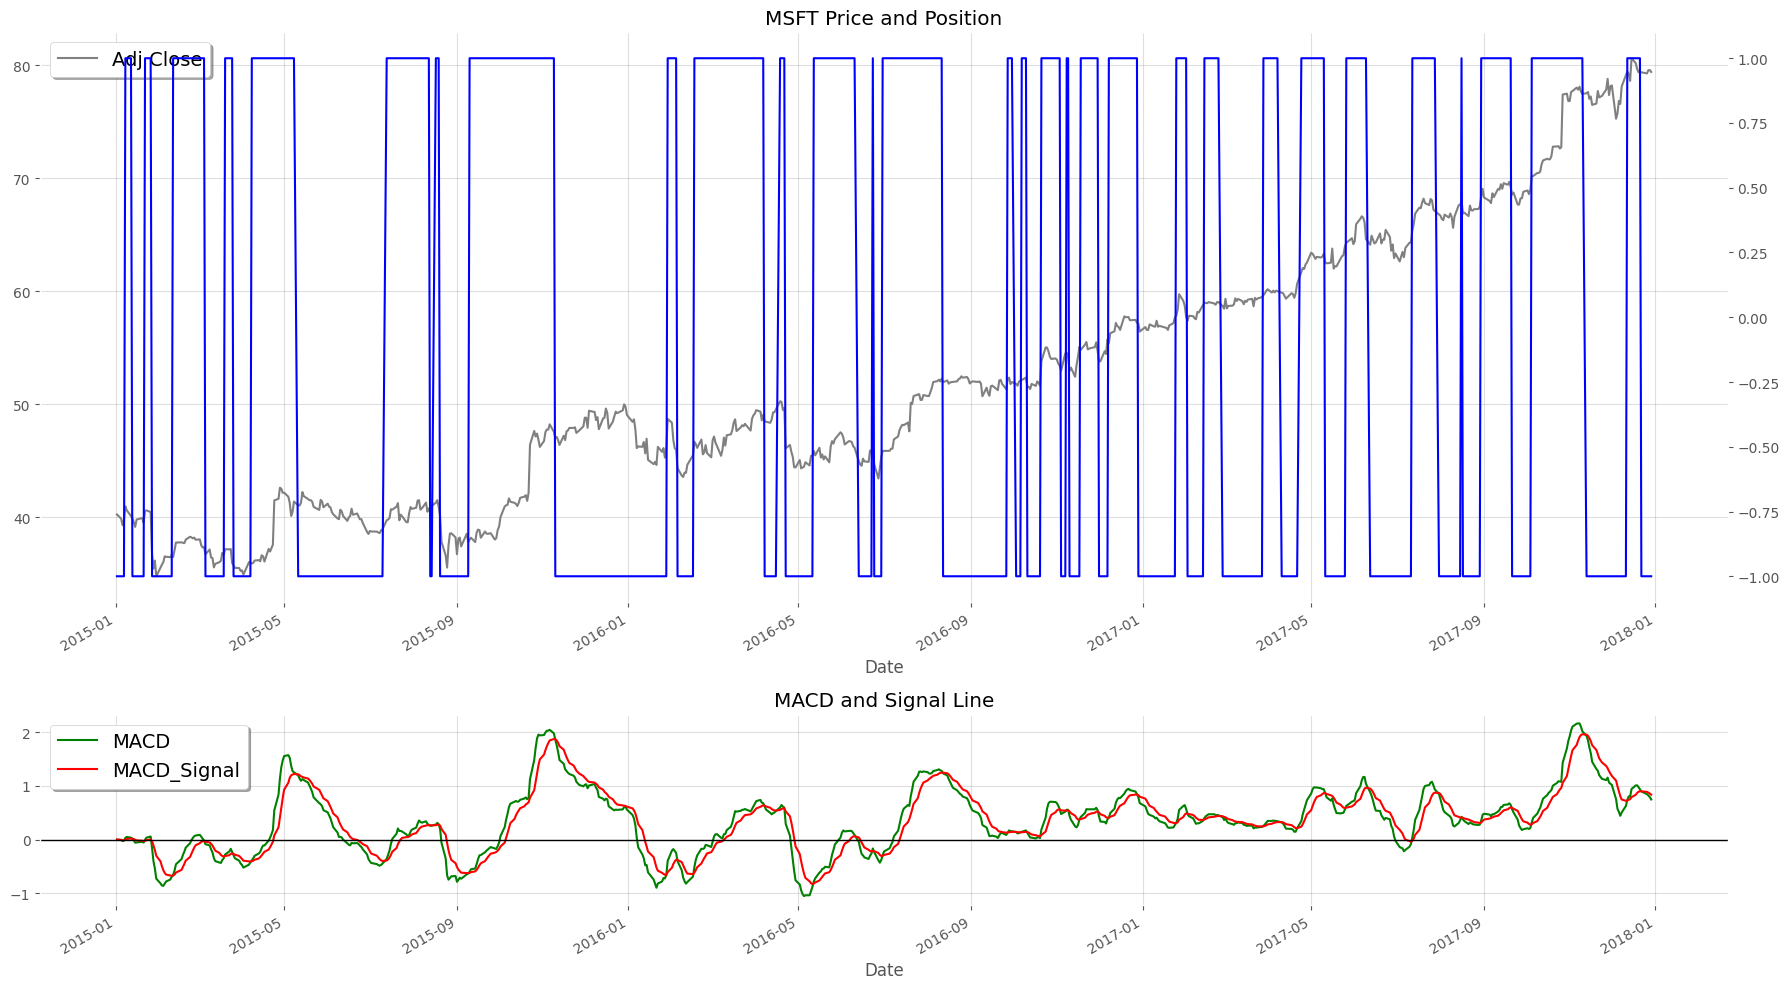

In [91]:
MSFT = MACD_Stock_Positions(Ticker="MSFT" , 
                            MACD_slow=MACD_slow, 
                            MACD_fast=MACD_fast, 
                            MACD_signal_line=MACD_signal_line, 
                            start=TA_start, 
                            end=TA_end)

In [92]:
MSFT = MACD_Cumulative_Returns(Ticker = MSFT , 
                               Initial_Capital=Initial_Capital, 
                               Commission=Commission)

The percentage cumulative return over this period is -30.97%


In [93]:
MSFT

,Adj Close,Slow,Fast,MACD,MACD_Signal,Position,log_returns,strategy_log_returns,Capital
Date,,,,,,,,,
2015-01-02,40.232841,40.232841,40.232841,0.000000,0.000000,-1,NaN,NaN,100000.000000
2015-01-05,39.862877,40.040744,40.032444,-0.008300,-0.004611,-1,-0.009238,0.009238,100928.093074
2015-01-06,39.277805,39.766628,39.737908,-0.028720,-0.014492,-1,-0.014786,0.014786,102431.490648
2015-01-07,39.776836,39.769482,39.750196,-0.019285,-0.016116,-1,0.012625,-0.012625,101146.408658
2015-01-08,40.946987,40.042550,40.075360,0.032810,-0.001561,1,0.028993,-0.028993,98245.926235
...,...,...,...,...,...,...,...,...,...
2017-12-22,79.384422,78.182696,79.078365,0.895669,0.898259,-1,0.000117,0.000117,69054.170356
2017-12-26,79.282303,78.264149,79.109740,0.845591,0.887725,-1,-0.001287,0.001287,69143.115471
2017-12-27,79.570091,78.360885,79.180563,0.819678,0.874116,-1,0.003623,-0.003623,68893.039272


In [94]:
MSFT_Sharpe = MACD_Sharpe(Ticker = MSFT)
MSFT_Sharpe

-0.5391081138193188

### <font color = red> Answer 8 </font>
    
RSI-MACD combined strategy strategy performs better.
    

> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊